
# <span style="color:#0b486b">Deep Neural Networks, Representation Learning, and Text Analytics</span>

## <span style="color:#0b486b">Instruction</span>

This task contains **two** parts 

* Part 1: Deep Feedforward Neural Network ****
* Part 2: Word2Vec, text analytics and application ****

## <span style="color:#0b486b">Part 1: Deep Feedforward Neural Network </span>


*Run the following cell to create necessary subfolders for this assignment. You must **not** modify these codes and **must** run it first*.

In [1]:
# Create necessary subfolders to store immediate files for this assignment.

import os
if not os.path.exists("./models/dnn0"):
    os.makedirs("models/dnn0")

The first part of this task is to apply DNN to recognize letters from A-Z. 

In this task, you are going to work with the **notMNIST** dataset for *letter recognition task*. The dataset contains 10 classes of letters A-J taken from different fonts. You will see some examples at the visualization task in the next part. A short blog about the data can be found [here](http://yaroslavvb.blogspot.com.au/2011/09/notmnist-dataset.html).

Here we only consider a small subset which can be found at [this link](http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat). This file has been already downloaded and stored in subfolder `datasets` of this assignment folder. The file is in *Matlab* format, thus our first task is to:

####  <span style="color:red">**Part 1.1**</span>. Load the data into *`numpy array`* format of two variables:
* *`x`*: storing features with dimension `[num_samples, width, height]` (`num_samples`: number of samples, `width`: image width, `height`: image height), and
* *`y`*: storing labels with dimension `num_samples`. 


In [2]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

import numpy as np
import scipy.io as sio
data = sio.matlab.loadmat("datasets/notMNIST_small.mat")
x, y = data['images'],data['labels']
x = np.rollaxis(x, axis=2)

####  <span style="color:red">**Part 1.2**</span>. Print out the total number of data points, and the *unique* labels in this dataset. 

In [3]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
print(f"Total number of data points are: {len(x)}")

unlab = np.unique(y)
print(f"Unique labels in the dataset are: {len(unlab)}")

Total number of data points are: 18724
Unique labels in the dataset are: 10


####  <span style="color:red">**Part 1.3**</span>. Display 100  images in the form of `10x10` matrix, each row showing 10 *random* images of a label. You might decide to use the function `display_images` provided at the beginning of this assignment, or you can write your own codes.

In [4]:
# this function is a utility to display images from the dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display_images(images, shape):
    fig = plt.figure(figsize=shape)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(np.prod(shape)):
        p = fig.add_subplot(shape[0], shape[1], i+1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)                

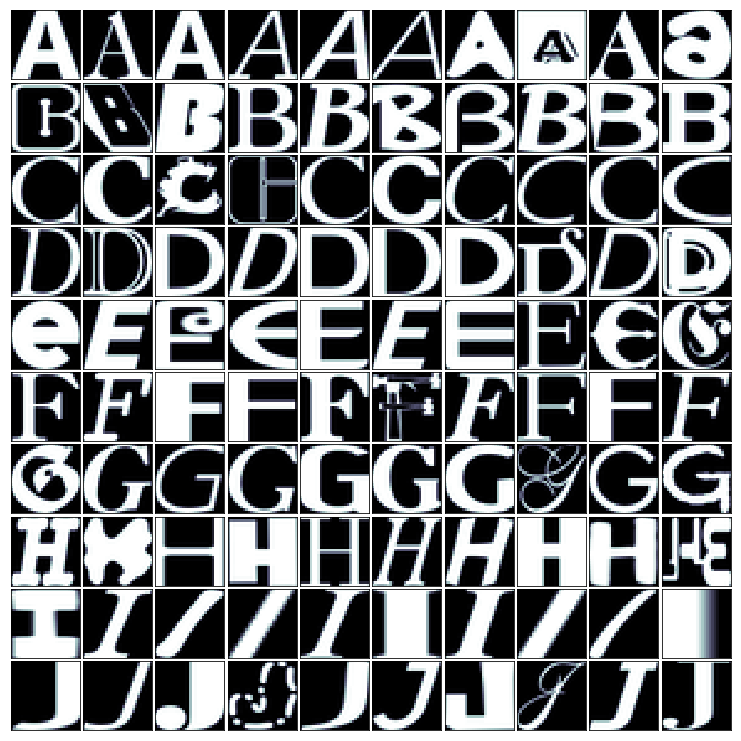

In [5]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

unique_labels = np.unique(y)     # INSERT YOUR CODE HERE
images = []
for l in unique_labels:    
    idx = np.where(y == l)[0]
    idx = idx[np.random.permutation(len(idx))[:10]]  
    for i in idx:
        images.append(x[i,].reshape((28,28)))           # INSERT YOUR CODE HERE

display_images(images, shape=(10, 10))

####  <span style="color:red">**Part 1.4**</span>. Use the *deep feedforward neural network* as the classifier to perform images classification task in a *single split training and testing*.

<span style="color:red">**(a)**</span> **Write your code to reshape the variable `x` storing features from `[num_samples, width, height]` dimension to `[num_samples, num_features]` with `num_features = width x height`. ** (*Hint*: you might want to use the `reshape()' function)

In [6]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
print(f"Original features fo x us num_samples,width,height and shape is {x.shape}")
x = x.reshape(x.shape[0],28*28)
print(f"Reshaping to num_samples,num_features and shape of x is: {x.shape}")

Original features fo x us num_samples,width,height and shape is (18724, 28, 28)
Reshaping to num_samples,num_features and shape of x is: (18724, 784)


In training the DNN, scaling data is important. The pixel intensities of images are in the range of [0, 255], which makes the neural network difficult to learn.

**Rescale the input data into the range of [0, 1]**

In [7]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
from sklearn import preprocessing
X_Scaled = preprocessing.scale(x)

<span style="color:red">**(b)**</span> **Split the data into two subsets: 70% for training and 30% for testing. Note that you must use [*Stratified-Shuffle-Split*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) to make sure training and testing are balanced and randomly shuffled before learning the model.**

In [8]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
from sklearn.model_selection import StratifiedShuffleSplit
k = StratifiedShuffleSplit(n_splits=10, test_size=0.3, train_size=0.7) 
k.get_n_splits(X_Scaled, y)

10

In [9]:
for train_index, test_index in k.split(X_Scaled, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_Scaled[train_index], X_Scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

<span style="color:red">**(c)**</span> **Construct a deep feedforward neural network with the following architecture:**

* An input layer followed by *two* hidden layers, each with *500* hidden units, and an *output* layer;
* *ReLU* activations for neurons in each hidden layer;
* Training with gradient descent optimizer with learning rate **0.0011**, batch size 128 and 50 epochs.

In [10]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL [5 marks]

import tensorflow as tf

tf.reset_default_graph()

num_inputs = 28*28 # INSERT YOUR CODE HERE
num_hidden1 = 500 # INSERT YOUR CODE HERE
num_hidden2 = 500 # INSERT YOUR CODE HERE
num_outputs = len(np.unique(y))
learning_rate = 0.01

inputs = tf.placeholder(tf.float32, shape=[None, num_inputs], name="x") # INSERT YOUR CODE HERE
labels = tf.placeholder(tf.int32, shape=[None], name="y") # INSERT YOUR CODE HERE

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL [3 marks]

def neuron_layer(x, num_neurons, name, activation=None):
    with tf.name_scope(name):
        # INSERT YOUR CODE HERE
        num_inputs = int(x.get_shape()[1])
        stddev = 2 / np.sqrt(num_inputs)
        init = tf.truncated_normal([num_inputs, num_neurons], stddev=stddev)
        W = tf.Variable(init, name="weights")
        b = tf.Variable(tf.zeros([num_neurons]), name="biases")
        z = tf.matmul(x, W) + b
    if activation == "sigmoid":
        # INSERT YOUR CODE HERE
        return tf.nn.sigmoid(z)
    elif activation == "relu":
        # INSERT YOUR CODE HERE
        return tf.nn.relu(z)
    else:
        return z

In [12]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL [7 marks]

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(inputs, num_hidden1, "hidden1", activation="relu") # INSERT YOUR CODE HERE
    hidden2 = neuron_layer(hidden1, num_hidden2, "hidden2", activation="relu") # INSERT YOUR CODE HERE
    logits = neuron_layer(hidden2, num_outputs, "output") # INSERT YOUR CODE HERE

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits) # INSERT YOUR CODE HERE
    loss = tf.reduce_mean(xentropy, name="loss")
    
with tf.name_scope("evaluation"):
   # INSERT YOUR CODE HERE
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits, name='xentropy')
    loss = tf.reduce_mean(xentropy, name='loss')
    correct = tf.nn.in_top_k(logits, labels, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name='accuracy')
    
with tf.name_scope("train"):
   # INSERT YOUR CODE HERE
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    grads = optimizer.compute_gradients(loss)    
    training_op = optimizer.apply_gradients(grads)
    
    for var in tf.trainable_variables():
        tf.summary.histogram(var.op.name + "/values", var)
        
    for grad, var in grads:
        if grad is not None:
            tf.summary.histogram(var.op.name + "/gradients", grad)

# summary
#accuracy_summary = tf.reduce_mean(tf.cast(correct, tf.float32), name='accuracy')  # INSERT YOUR CODE HERE
#print(accuracy_summary)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
# summary
accuracy_summary = tf.summary.scalar('accuracy', accuracy)
print(accuracy_summary)

Tensor("accuracy:0", shape=(), dtype=string)


In [13]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL [5 marks]

# merge all summary
tf.summary.histogram('hidden1/activations', hidden1)
tf.summary.histogram('hidden2/activations', hidden2)
merged = tf.summary.merge_all() # INSERT YOUR CODE HERE

init = tf.global_variables_initializer() # INSERT YOUR CODE HERE
saver = tf.train.Saver() # INSERT YOUR CODE HERE

train_writer = tf.summary.FileWriter("models/dnn0/train", tf.get_default_graph())
test_writer = tf.summary.FileWriter("models/dnn0/test", tf.get_default_graph())

num_epochs = 50 # INSERT YOUR CODE HERE
batch_size = 128 # INSERT YOUR CODE HERE

<span style="color:red">**(d)**</span> **You are now required write code to train the DNN.** Write codes in the following cell. 

In [14]:
def next_batch(num, data, labels):
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    datashuf = [data[ i] for i in idx]
    labelsshuff = [labels[ i] for i in idx]

    return np.asarray(datashuff), np.asarray(labelsshuff)

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

with tf.Session() as sess:
    init.run()
    print("Epoch\tTrain accuracy\tTest accuracy")
    for epoch in range(num_epochs):
        for idx_start in range(0, X_train.shape[0], batch_size):
            idx_end = X_train.shape[0] - batch_size # INSERT YOUR CODE HERE
            x_batch, y_batch = next_batch(idx_end,X_train,y_train) # INSERT YOUR CODE HERE
            sess.run(training_op, feed_dict={inputs: x_batch, labels: y_batch})
        summary_train, acc_train = sess.run([merged, accuracy],
                                             feed_dict={x: x_batch, y: y_batch})# INSERT YOUR CODE HERE
        summary_test, acc_test = sess.run([accuracy_summary, accuracy],
                                          feed_dict={x: x_test, y: y_test})# INSERT YOUR CODE HERE
        
        train_writer.add_summary(summary_train, epoch)
        test_writer.add_summary(summary_test, epoch)
        
        print("{}\t{}\t{}".format(epoch, acc_train, acc_test))

    save_path = saver.save(sess, "models/dnn0.ckpt")

---

## <span style="color:#0b486b">Part 2: Word2Vec, Text Analytics and Application</span>



In this part, you are going to use Word2Vec for document classification on [20 Newsgroups](http://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/news20.html) dataset. This dataset is a collection of messages collected from 20 different netnews newsgroups. One thousand messages from each of the twenty newsgroups were chosen at random and partitioned by newsgroup name. The list of newsgroups from which the messages were chosen is as follows:

`
alt.atheism
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc
soc.religion.christian
comp.sys.ibm.pc.hardware
comp.graphics
comp.os.ms-windows.misc
comp.sys.mac.hardware
comp.windows.x
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.space
sci.med
misc.forsale
`

### <span style="color:#0b486b"> Download the dataset and data pre-processing</span>

####  <span style="color:red">**Part 2.1**</span> Your first task is to run the following code to download the dataset.


In [15]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_all = fetch_20newsgroups(subset='all', remove=('headers'))

####  <span style="color:red">**Part 2.2**</span>. Print out the total number of documents, and the *unique* labels in this dataset.

In [16]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
print(f"Total number of documents are: {len(newsgroups_all.data)}")
print(f"Unique labels are: {len(np.unique(newsgroups_all.target))}")

Total number of documents are: 18846
Unique labels are: 20


####  <span style="color:red">**Part 2.3**</span>. Convert the documents into a list of tokens using the function `gensim.utils.tokenize`.

In [36]:
import gensim

# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
from gensim.utils import tokenize
tokens=[]

for i in range(0,len(newsgroups_all.data)):
    tokens.append(list(tokenize(newsgroups_all.data[i], lowercase=False, deacc=False, errors='strict', to_lower=False, lower=False)))

### <span style="color:#0b486b"> Train the model </span>


####  <span style="color:red">**Part 2.4**</span>. Train gensim's word2vec model.

* Train gensim's word2vec model with the settings of:
    * The dimensionality of the feature vectors: `size=100`,
    * The maximum distance between the current and predicted word within a sentence: `window=5`,
    * Minimum frequence (ignore all words with total frequency lower than this): `min_count=5`,


In [18]:
from gensim.models import Word2Vec

# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# parameters for training
sg_ = 1 # the training algorithm. If sg=0, CBOW is used. Otherwise (sg=1), skip-gram is employed.
alg = 'CBOW' if sg_ == 0 else 'sg'
size_ = 100 #  the dimensionality of the feature vectors
window_ = 5 # the context size or the maximum distance between the current and predicted word
min_count_ = 5 # minimum frequency count of words

# training embedded vectors for the dataset with the parameters specified above
model = Word2Vec(tokens, sg = sg_, size = size_, window = window_, min_count=min_count_)

* Save the trained model to a file named "20_newsgroups.gensim"

In [19]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

model_file = '20_newsgroups.gensim'
model.save(model_file)

####  <span style="color:red">**Part 2.5**</span>. Print out the vocabulary size (number of words in vocabulary).

In [20]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
words = list(model.wv.vocab.keys())
print(f"The number of words: {len(words)}")

The number of words: 42461


####  <span style="color:red">**Part 2.6**</span>. Using the embedding results, calculate and print out the ten most similar words to word 'law' and their corresponding similarity scores.<div style="text-align: right"></div> 

In [21]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
model.wv.most_similar(positive='law',topn=10)

C:\Users\user\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('enforcement', 0.8472471833229065),
 ('abiding', 0.7646981477737427),
 ('laws', 0.7071508169174194),
 ('court', 0.7016454935073853),
 ('federal', 0.6984068155288696),
 ('Enforcement', 0.691161036491394),
 ('legitimate', 0.6902716755867004),
 ('giveth', 0.6866155862808228),
 ('fasad', 0.6820076704025269),
 ('felony', 0.6818886995315552)]

### <span style="color:#0b486b"> Evaluate the embeddings using classification </span>

Now we investigate the quality of embedded vectors via document classification task. We have learned the embeddings for words, but not for documents yet, thus we need to find a way to extract the document embeddings from word embeddings. We are going to try two approaches:
* Taking the **sum** of vectors of all words in the document; or
* Taking the **average** of vectors of all words in the document.

####  <span style="color:red">**Part 2.7**</span>. Extract document vectors using `sum`.

* Remove all ***empty*** documents. A document is empty if it does not contain any word in the vocabulary;
* Extract document vectors and save to variable `x`;
* Save the corresponding labels to variable `y`.

In [22]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

def extract_doc2vec(doc, w2v):
    vecs = [w2v[word] for word in doc if word in w2v]
    if len(vecs) > 0:
        vecs = np.asarray(vecs).sum(axis=0)
    return vecs

# INSERT YOUR CODE HERE
def remove_empty_docs(corpus, labels):
    filtered_corpus = []
    filtered_labels = []
    for doc, label in zip(corpus, labels):
        if doc.strip():
            filtered_corpus.append(doc)
            filtered_labels.append(label)
    return filtered_corpus, filtered_labels


# get corpus of documents and their corresponding labels
corpus, labels = newsgroups_all.data, newsgroups_all.target
print(f"Number of documents before removing empty documents are: {len(corpus)}")
corpus, labels = remove_empty_docs(corpus, labels)

Number of documents before removing empty documents are: 18846


In [23]:
#print(extract_doc2vec(corpus,model))
x=[]
y=[]
for i in range(0,len(corpus)):
    x.append(extract_doc2vec(corpus[i], model))
    y.append(labels[i])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


####  <span style="color:red">**Part 2.8**</span>. Print out the number of documents retained after removing empty documents.

In [24]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
print(f"Number of documents retained after removing empty documents are: {len(corpus)}")

Number of documents retained after removing empty documents are: 18812


#### <span style="color:red">**Part 2.9**</span>. Split the data into two subsets: 70% for training and 30% for testing. Note that you must use [*Stratified-Shuffle-Split*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) to make sure training and testing are balanced and randomly shuffled before learning the model.

In [25]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
from sklearn.model_selection import StratifiedShuffleSplit
k = StratifiedShuffleSplit(n_splits=10, test_size=0.3, train_size=0.7,random_state=0) 
k.get_n_splits(x, y)

x= np.asarray(x)
y= np.asarray(y)

for train_index, test_index in k.split(x, y):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

X_train, X_test = X_train.tolist(), X_test.tolist()
y_train, y_test = y_train.tolist(), y_test.tolist()


In [26]:
import pandas as pd
X_test = pd.DataFrame(X_test)
X_test =  X_test.fillna((X_test).mean())
y_test=pd.DataFrame(y_test)

#### <span style="color:red">**Part 2.10**</span>. **Use [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) as the classifier, train and test the model using the training and test datasets from the previous step. Report the training accuracy and testing accuracy.**

In [27]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

logistic = LogisticRegression(penalty='l2', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='newton-cg', \
            max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=1)

logistic.fit(X_train,y_train)

results = cross_val_score(logistic, X_train, y_train, cv=k, scoring='accuracy', verbose=1, n_jobs=-1)
print(f"Accuracy mean is : {results.mean()}")

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Accuracy mean is : 0.3416350291065553


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 14.5min finished


In [28]:
results1 = cross_val_score(logistic, X_test, y_test, cv=k, scoring='accuracy', verbose=1, n_jobs=-1)
print(f"Accuracy mean is : {results1.mean()}")

Accuracy mean is : 0.32922077922077925


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  7.5min finished


In [29]:
from sklearn.metrics import classification_report
pred_labels=logistic.predict(X_test)
print(classification_report(pred_labels,y_test))

             precision    recall  f1-score   support

          0       0.27      0.31      0.29       213
          1       0.24      0.28      0.26       254
          2       0.31      0.30      0.31       302
          3       0.31      0.33      0.32       280
          4       0.31      0.31      0.31       281
          5       0.49      0.49      0.49       298
          6       0.43      0.35      0.39       363
          7       0.26      0.27      0.26       281
          8       0.43      0.32      0.37       401
          9       0.39      0.36      0.38       321
         10       0.52      0.40      0.45       394
         11       0.43      0.35      0.39       359
         12       0.15      0.21      0.17       213
         13       0.25      0.30      0.27       250
         14       0.27      0.35      0.30       231
         15       0.45      0.42      0.44       321
         16       0.28      0.35      0.31       218
         17       0.56      0.42      0.48   

####  <span style="color:red">**P 2.11**</span>. Now modify the `extract_doc2vec` function above to  extract document vectors using `average`, instead of `sum`, and repeat the experiment: split the data, train and test using Logistic Regression.
<div style="text-align: right"><span style="color:red">**[5 points]**</span></div> 

In [30]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
def extract_doc2vec(doc, w2v):
    vecs = [w2v[word] for word in doc if word in w2v]
    if len(vecs) > 0:
        vecs = np.asarray(vecs).mean(0)
    return vecs

In [31]:
#print(extract_doc2vec(corpus,model))
x1=[]
y1=[]
for i in range(0,len(corpus)):
    x1.append(extract_doc2vec(corpus[i], model))
    y1.append(labels[i])
    

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
from sklearn.model_selection import StratifiedShuffleSplit
k1 = StratifiedShuffleSplit(n_splits=10, test_size=0.3, train_size=0.7,random_state=0) 
k1.get_n_splits(x1, y1)

x1= np.asarray(x1)
y1= np.asarray(y1)

for train_index, test_index in k1.split(x1, y1):
    X_train1, X_test1 = x1[train_index], x1[test_index]
    y_train1, y_test1 = y1[train_index], y1[test_index]

X_train1, X_test1 = X_train1.tolist(), X_test1.tolist()
y_train1, y_test1 = y_train1.tolist(), y_test1.tolist()

import pandas as pd
X_test1 = pd.DataFrame(X_test1)
X_test1 =  X_test1.fillna((X_test1).mean())
y_test1=pd.DataFrame(y_test1)

In [33]:
logistic1 = LogisticRegression(penalty='l2', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='newton-cg', \
            max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=1)

logistic1.fit(X_train1,y_train1)

result = cross_val_score(logistic1, X_train1, y_train1, cv=k1, scoring='accuracy', verbose=1, n_jobs=-1)
print(f"Accuracy mean is : {result.mean()}")

Accuracy mean is : 0.22867628448494054


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   55.3s finished


In [34]:
result1 = cross_val_score(logistic, X_test1, y_test1, cv=k1, scoring='accuracy', verbose=1, n_jobs=-1)
print(f"Accuracy mean is : {result1.mean()}")

Accuracy mean is : 0.19964580873671783


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.3s finished


In [35]:
from sklearn.metrics import classification_report
pred_labels1=logistic.predict(X_test1)
print(classification_report(pred_labels1,y_test1))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.00      0.00      0.00         0
          6       1.00      0.05      0.10      5644
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         0
          9       0.00      0.00      0.00         0
         10       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         0
         12       0.00      0.00      0.00         0
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0
         17       0.00      0.00      0.00   

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


####  <span style="color:red">**Question 2.12**</span>. Which representation (sum or average doc vector) gives the best performance? Write your observations and any lessons learned.
<div style="text-align: right"><span style="color:red">**[5 points]**</span></div> 


*[ANSWER]*

When we extract the document vectors using average we got the training accuracy is 22.86% and testing accuracy is 19.96%. The precision is 1, recall is 0.05, f1-score is 0.10.


When we extract the document vectors using sum we got the training accuracy is 34.16% and testing accuracy is 32.92%. The precision is 0.36, recall is 0.34, f1-score is 0.35.
 
From the above results, we can see that sum doc vec perform far better than the average doc vector. But overall the models are not that accurate. In case of sum doc vectors each label is being classified, whereas in case of average doc vector only label that is classified is class 6. Hence, we can see that sumdoc vec is better than the other in terms of accuracy, precision, recall and f1-score. 

From this assignment we learned about the tensor flow using the deep forward and the neural networks and looked at the letter recognition task, where we calculated the accuracy of the model using different methods. Then we learnt about the text analytics, where we converted the documents into tokens and used it to build our models. THen we created our vocuablary and looked at the similary words. We used sum doc vector and average doc vector embedding classification techniques and computed the accuracies. Hence sum doc vec is better than the average.

--- 
<div style="text-align: center"> <span style="color:black">**END OF ASSIGNMENT**</span> </div>